In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [22]:
penguins = sns.load_dataset("penguins")

In [24]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


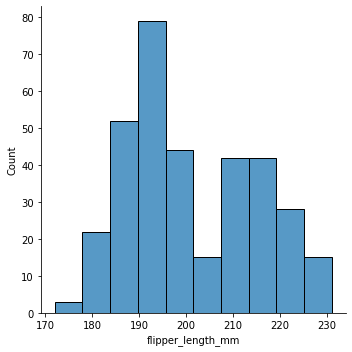

In [25]:
sns.displot(penguins, x="flipper_length_mm")

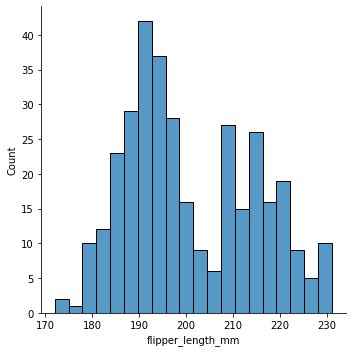

In [28]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

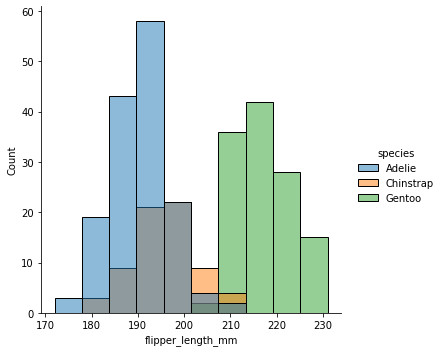

In [34]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

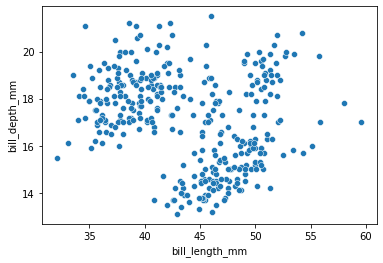

In [35]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

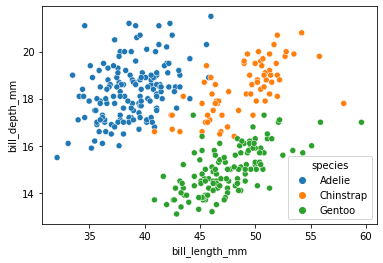

In [36]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [29]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


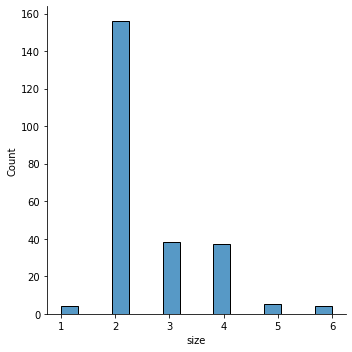

In [30]:
sns.displot(tips, x="size")

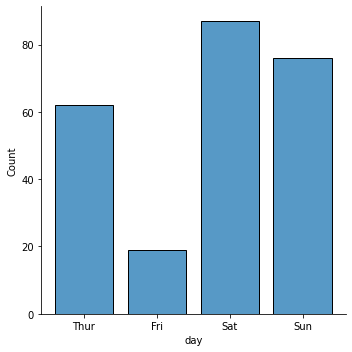

In [33]:
sns.displot(tips, x="day", shrink=.8)

In [39]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


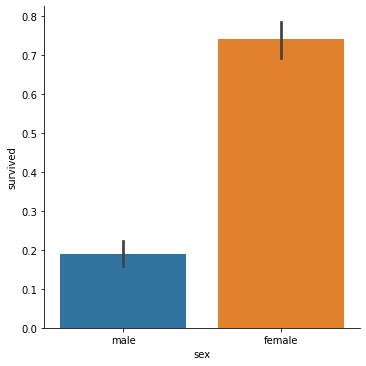

In [40]:
sns.catplot(x="sex", y="survived", kind="bar", data=titanic)

In [2]:
def get_value_counts(df, orient="index", bins=10):

    value_counts = {}
    for col in df.columns:
        if len(df[col].unique()) <= 10:
            #value_counts[col] = df[col].value_counts().to_dict()
            tmp = df[col].value_counts()
            tmp.sort_index(inplace=True)
            
            tmp = tmp.to_json(orient=orient)
            value_counts[col] = json.loads(tmp)

        elif str(df[col].dtypes).startswith("int") or str(df[col].dtypes).startswith("float"):
            tmp = pd.cut(df[col], bins=bins).value_counts()
            tmp.sort_index(inplace=True)
            tmp.index = tmp.index.astype("str")
            tmp.index = tmp.index.map(lambda x: x[1:-1].replace(",", " -"))

            tmp = tmp.to_json(orient=orient)
            value_counts[col] = json.loads(tmp)

            # value_counts[col] = tmp.to_dict()
        else:
            value_counts[col] = None

    return value_counts

In [9]:
df = pd.read_csv("./data/titanic.csv")

In [62]:
tmp = df["Age"][:10].value_counts()
tmp.sort_index(inplace=True)
tmp

2.0     1
14.0    1
22.0    1
26.0    1
27.0    1
35.0    2
38.0    1
54.0    1
Name: Age, dtype: int64

In [54]:
tmp = pd.cut(df["Age"], bins=10).value_counts()
tmp.sort_index(inplace=True)
tmp.index = tmp.index.astype("str")
tmp.index = tmp.index.map(lambda x: x[1:-1].replace(",", " -"))
tmp

0.34 - 8.378        54
8.378 - 16.336      46
16.336 - 24.294    177
24.294 - 32.252    169
32.252 - 40.21     118
40.21 - 48.168      70
48.168 - 56.126     45
56.126 - 64.084     24
64.084 - 72.042      9
72.042 - 80.0        2
Name: Age, dtype: int64

In [15]:
s = pd.Series([1, 2, 3, 4], index=['A', 'b', 'C', 'd'])
s.sort_index(key=lambda x : x.str.lower())

A    1
b    2
C    3
d    4
dtype: int64

<AxesSubplot:>

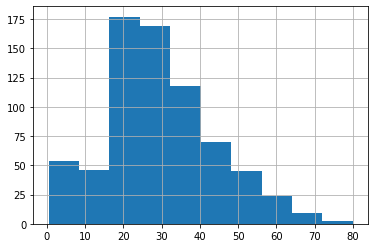

In [57]:
df["Age"].hist()

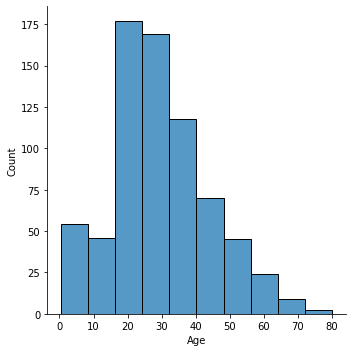

In [65]:
sns.displot(df, x="Age", bins=10)